In [1]:
import math
%matplotlib inline

In [2]:
# Define functions for calculating min, max, sum, mean, variance, std, median, median absolute deviance
def my_min(arr):
    low = None

    for item in arr:
        if low is None or item < low:
            low = item

    return low

def my_max(arr):
    return -my_min([-a for a in arr])

def my_sum(arr):

    sum = 0

    for item in arr:
        sum += item

    return sum

def my_mean(arr):
    return sum(arr) / len(arr)

def my_variance(arr):

    mean = my_mean(arr)

    return my_sum([(item - mean) ** 2 for item in arr]) / len(arr)

def my_std(arr):

    return math.sqrt(my_variance(arr))

def my_median(arr):

    arr = sorted(arr)
 
    n = len(arr)

    if n % 2:
        return arr[n // 2]
 
    return (arr[(n-1) // 2] + arr[n//2]) / 2

def my_median_abs_dev(arr):

    m = my_median(arr)

    return my_median([abs(item - m) for item in arr])

In [3]:
# Tasks 1-3, examine the array of grades. We will use numpy built in methods to check our functions for correctness.
import numpy as np

grades = [8,6,1,7,8,9,8,7,10,7,6,9,7]

print("min", my_min(grades), np.min(grades))
print("max", my_max(grades), np.max(grades))
print("sum", my_sum(grades), np.sum(grades))
print("mean", my_mean(grades), np.mean(grades))
print("variance", my_variance(grades), np.var(grades))
print("standard deviation", my_std(grades), np.std(grades))
print("median", my_median(grades), np.median(grades))
print("median absolute deviation", my_median_abs_dev(grades), np.median(np.absolute(np.array(grades) - np.median(grades))))

min 1 1
max 10 10
sum 93 93
mean 7.153846153846154 7.153846153846154
variance 4.437869822485207 4.437869822485207
standard deviation 2.106625221173716 2.106625221173716
median 7 7.0
median absolute deviation 1 1.0


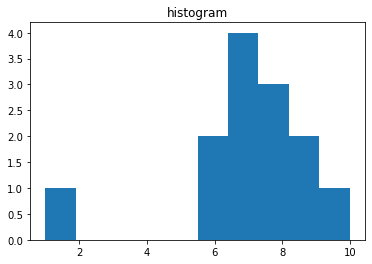

In [4]:
# Task 4
from matplotlib import pyplot as plt

plt.hist(grades)
plt.title("histogram")
plt.show()

Task 4

- Most frequenct value is 7 
- The value 1 is far from the rest and thus appears to be an outlier.

### Task 5

In [5]:
# Task 5 -- Load housing data and have a quick look at it
import pandas as pd

df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Task 5a & 5b
print("Number of districts", df.shape[0])
print("Mean house values", my_mean(df.median_house_value.values))

Number of districts 20640
Mean house values 206855.81690891474


households min 1.0 max 6082.0 mean 499.5396802325581


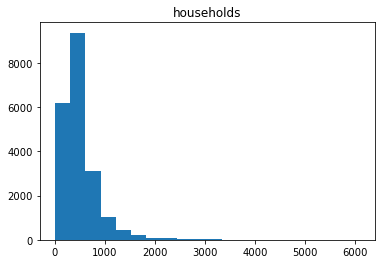

median_income min 0.4999 max 15.0001 mean 3.8706710029070246


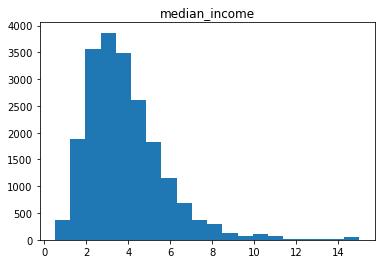

housing_median_age min 1.0 max 52.0 mean 28.639486434108527


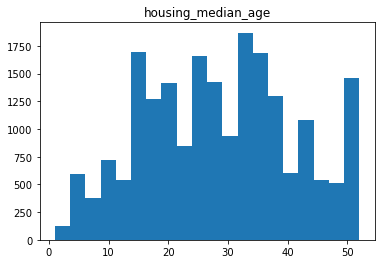

median_house_value min 14999.0 max 500001.0 mean 206855.81690891474


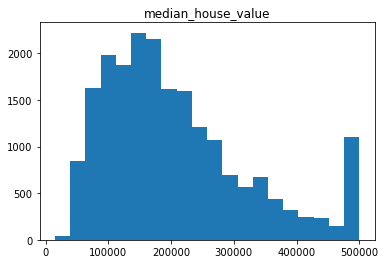

In [7]:
# Task 5c
def explain(arr, title):
    print(title, "min", my_min(arr), "max", my_max(arr), "mean", my_mean(arr))
    plt.hist(arr, bins=20)
    plt.title(title)
    plt.show()

explain(df.households, "households")
explain(df.median_income, "median_income")
explain(df.housing_median_age, "housing_median_age")
explain(df.median_house_value, "median_house_value")


Task 5d

- Median age has likely been preprocessed as the range is [1,52], potentially shifted as the minimum value is 1 year and max 52. It seems reasonable to assume that a shift ca 20 years has been applied.
- Median house value seem to max out at 500001 as that is the max value and a disproportionally large amount of districs have median house value at this value. 

Task 5e

- The magnitude of median house values appear to be reasonable with a range of ca USD [15k,50k], which seems likely in the US housing market. However, the magnitude of median_income looks to be preprocessed (or in different unit) as the range is ca [0.5, 15].